# Assignment #3

# 1. K-means from scratch (25 points)

Code up the K-means algorithm. To test your code, sample from the three bivariate Gaussian distributions provided below and find three clusters from this sampled data. To initialize your algorihtm, you may use the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot similar to the one shown below. For consistency, set the random seed to 1 before sampling from the three bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
3.0\\
0.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-6.0\\
3.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
-2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \mathbf{\Sigma_3} = \begin{bmatrix}
1.0&0.5\\
0.5&1.0\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

$$\mathbf{c_3} = \begin{bmatrix}
-2.0\\
2.0\\
\end{bmatrix}$$

* Example of final scatter plot

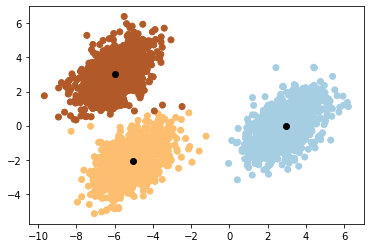

# 2. Choosing the appropriate clustering approach (25 points)

The file `/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif` is a map of lakes in the bounding box minlon = -96, maxlon = -95.9, minlat = 46.4, and maxlat = 46.5 at a 30 meter spatial resolution. All pixels that belong to a lake are assigned 1 while every pixel that is not part of a lake is set to 0. In this problem we will use cluster analysis to group together contiguous pixels to uniquely define all the lakes in the map. 

**A.** After reading in and preprocessing the data for use in cluster analysis, use the following cluster algorithms with the given associated parameters to cluster the data:


    * Agglomerative Clustering with single linkage (n_clusters=25)
    * DBSCAN (eps = 5, min_samples = 10)
    * K-Means (n_clusters = 25)
    * Gaussian Mixture Model (n_components = 25)


**B.** Provide a scatter plot of the results of each algorithm. The color of each point on the scatter plot should be associated with a cluster. 


**C.** Discuss the results with an emphasis on explaining the strengths and deficiencies of each algorithm in the context of clustering the lakes. 


**D.** Having clustered the pixels into unique lakes, compute and report the mean and standard deviation of the area of the lakes. 

# 3. Predicting soil taxonomy (50 pts)

In the United States, soils are classified using the [USDA soil taxonomy](https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_051232.pdf). Within the USDA soil taxonomy, the most general level is the taxonomic order. In this problem we will be using a suite of decision-tree based classification algorithms to create spatial maps of taxonomic order over western Illinois. The point observations come from the [NASIS database](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/tools/?cid=nrcs142p2_053552) while the environmental predictors come from Sentinel 2, the National Elevation Data, and the National Land Cover database.

All the data has already been subsetted and preprocessed and are available in the following NetCDF file `/data/HW/HW3/HW3.nc`. The file is split into two groups: predictors and observations. The predictors group contains a set of 1 arcsec maps for the domain and the observations group contains the in-situ taxonomic order observations with their associated geographic coordinates. Although not required, we recommend using xarray to read in these data. 

**A.** Read in and create maps of all the predictors. Describe any apparent discrepancies in spatial resolution between the maps.

**B.** Read in the in-situ observations and assemble the corresponding predictors for each site. Create the $\mathbf{X}$ array of predictors and the $\mathbf{y}$ array of observed taxonomic orders. Note that you will need to convert the taxonomic order names to integers.

**C.** Use the validation set approach to divide your data into training and test datasets. Each dataset should contain 50% of the data. Then fit a Decision tree using the training data and evaluate its accuracy for both the training and test datasets. Explain the differences in accuracy when evaluating the training and test datasets. To ensure reproduceability, when initializing the decision tree, set the random_state to 1.

**D.** Using  all the site data, perform a 10-fold cross validation of the decision tree and compare the results to the previous exercise. Set random_state to 1 and set shuffle to True.

**E.** Setting the number of decision trees to 100, perform a 10-fold cross validation using Bagging, Random Forests, and Gradient Boosting. Discuss how the results of these different ensemble methods vary amongst themselves. Also compare the results to those obtained from a single decision tree. Remember to set random_state to 1.

**F.** Using 100 trees, fit a Random Forest to the entire sites dataset and report the out of bag score. Compare that result to that obtained from the cross validation. Explain what the out of bag score is and how it can be more useful than cross validation. Remember to set random_state to 1.

**G.** Iterate through the number of decision trees varying from 1 to 100 in 1 tree increments. For each iteration, fit a Random Forest and append the corresponding out of bag score to a list. Plot the out of bag score as a function of the number of decision trees. What do you learn about the optimal number of trees for this problem?

**H.** After fitting a random forest with 100 trees, plot a map of the entire region of the predicted taxonomy order.